## **Paramount TV**

### 1. Exploración y Preparación de los Datos

Datos descargados de Kaggle

(Mismo código en todos los notebooks de datos)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


In [2]:
data_paramount = pd.read_csv('../src:data/Data_Paramount/datos_paramount.csv')

print("Filas, columnas:", data_paramount.shape)
data_paramount.head()

Filas, columnas: (2825, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,NaN,197,"['history', 'drama']",['US'],NaN,tt0006864,7.7,15242.0,9.412,7.2


In [3]:
# Tipo de dato
data_paramount.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [4]:
# Missings

data_paramount.isna().sum()

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification       1523
runtime                    0
genres                     0
production_countries       0
seasons                 2199
imdb_id                  159
imdb_score               212
imdb_votes               212
tmdb_popularity           57
tmdb_score               488
dtype: int64

In [5]:
#Nulls en porcentaje
for i in data_paramount.isna().sum():
    print((i/data_paramount.shape[0])*100)

#Destacamos que el 78% de los valores de la columna season son nulos, o no incluye esa información o la mayoría son películas, o las series solo tienen 1 temp (dif plat / real)
# También destacamos que más de la mitad de los títulos no tienen edad recomendada

0.0
0.0
0.0
0.4601769911504424
0.0
53.911504424778755
0.0
0.0
0.0
77.84070796460178
5.628318584070797
7.504424778761062
7.504424778761062
2.017699115044248
17.27433628318584


<AxesSubplot:>

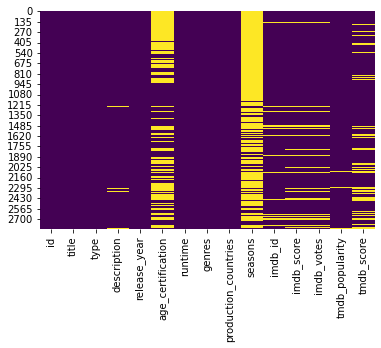

In [6]:
sns.heatmap(data_paramount.isnull(),cbar=False,cmap='viridis')

1.2. Columnas

- ID: ID del título en JustWatch

- title: nombre del título

- show type: SHOW o MOVIE - diferenciación entre pelicula o serie

- description: breve descripción

- release year: año de estreno

- age certification: orientacion a padres de edad mínima recomendada

- runtime: duración

- genres: lista de géneros

- production countries: lista de países que produjeron el título

- seasons: número de temporadas

- IMDB ID: ID del título en IMDB

- IMDB Score: puntuación en IMDB

- IMDB Votes: votos en IMDB

- TMDB Score: puntuación en TMDB

- TMDB Popularity: popularidad en TMDB

    La métrica de popularidad de TMDB se mide -diariamente- en función de los parámetros:
    - N de votos al día
    - N vistas de pág al día    
    - N usuarios que marcan el título como favorito    
    - Fecha de estreno +  fecha de emisión del último/nuevo episodio    
    - N total de votos
    - Puntuación de los días anteriores

In [7]:
print(data_paramount.columns)
print("N columnas:", len(data_paramount.columns))

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
N columnas: 15


In [8]:
# Título
# Cada título representa un contenido 'único' de la plataforma
# Comprobamos que no haya duplicados (ya sabemos que no hay nulos)

print('Tipo de dato:', data_paramount['title'].dtype)
titulos_duplicados = data_paramount.loc[data_paramount.duplicated(['title'])]
print("n titulos duplicados:", titulos_duplicados.shape[0])
titulos_unicos = data_paramount['title'].nunique()
print("valores repetidos:", data_paramount.shape[0] - titulos_unicos)

Tipo de dato: object
n titulos duplicados: 15
valores repetidos: 15


In [9]:
# Tenemos 15 titulos duplicados, pero esto no indica que sean la misma película/serie
# Comprobamos duplicados que coincidan en título, tipo de contenido, año de estreno y duración:

print("n duplicados:", data_paramount[data_paramount.duplicated(subset=['title', 'type', 'release_year', 'runtime'])].shape[0])
data_paramount[data_paramount.duplicated(subset=['title', 'type', 'release_year', 'runtime'])]

# Ningún duplicado en este dataset

n duplicados: 0


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [10]:
# Eliminamos las columnas con el id de Imdb ya que no hemos sacado informacion de estas webs - más allá de la ya dada en el dataset
# Tampoco vamos a utilizar en este análisis la descripción de las películas
# Mantenemos tanto la valoración de imdb como de tndm porque al pertenecer imdb a amazon podría haber datos sesgados

data_paramount1 = data_paramount.drop(['imdb_id', 'description'], axis=1).copy()
print("N columnas:", data_paramount1.shape[1])
data_paramount1.head()

N columnas: 13


,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,1936,NaN,57,"['crime', 'drama']",['US'],NaN,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,1916,NaN,197,"['history', 'drama']",['US'],NaN,7.7,15242.0,9.412,7.2


In [11]:
# Comprobamos que la columna id tiene valores únicos para cada título 
# --> por si lo necesitásemos a la hora de juntar las tablas de todas las plataformas y diferenciar por contenido exclusivo 
# (por eso no eliminamos esta columna)
print("Valores unicos:", data_paramount1['id'].nunique())
print("n filas:", data_paramount1['id'].shape[0])

Valores unicos: 2825
n filas: 2825


In [12]:
# Comprobamos los valores de la vble type y nos aseguramos que es de tipo string
# --> La utilizaremos para diferenciar los títulos
data_paramount1['type'] = data_paramount1['type'].astype(str)
data_paramount1['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [13]:
#Creamos la columna década (tiene más sentido para clasificar el contenido)

decadas = (10 * (data_paramount1['release_year'] // 10)).astype(str) + 's'
data_paramount1.insert(4, 'Decada', decadas)

#Eliminamos la columna release_year
del data_paramount1['release_year']

In [14]:
df_decadas_paramount = pd.DataFrame(data_paramount1['Decada'].value_counts())
total = df_decadas_paramount['Decada'].sum()
df_decadas_paramount['total'] = [round((i/total)*100, 2) for i in df_decadas_paramount['Decada']]
df_decadas_paramount

# Algun error?? 2010s como en el resto de plataformas tiene un peso de casi el 40, pero 2020s está por debajo del contenido de 1930 ??
# Ver--> por qué 1930 y 1940 tiene un peso tan alto comparado con el resto de plat

,Decada,total
2010s,1113,39.40
2000s,270,9.56
1940s,241,8.53
1930s,225,7.96
2020s,218,7.72
1990s,165,5.84
1980s,150,5.31
1970s,132,4.67
1950s,127,4.50
1960s,118,4.18


In [15]:
# age_certificacion --> 54% valores nulos
print("Valores NaN:", len(data_paramount1[data_paramount1['age_certification'].isna() == True]))
print("Valores:", len(data_paramount1[data_paramount1['age_certification'].isna() != True]))
#vemos variables para redefinirlas
print("Valores Columna Edad:", data_paramount1['age_certification'].unique())

Valores NaN: 1523
Valores: 1302
Valores Columna Edad: [nan 'G' 'PG' 'PG-13' 'R' 'TV-PG' 'TV-G' 'TV-Y7' 'TV-MA' 'TV-14' 'TV-Y'
 'NC-17']


In [16]:
# Redefinimos los valores

"""
- G:        > 0 - Todas las edades
- TV-G:     > 0 publico general 
- TV-Y:     < 6 años 
- TV-Y7:    < 7 años 
- TV-PG:    < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG:       < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG-13:    > 13
- TV-14:    > 14 
- R:        > 17 - Restringido
- NC-17:    > 17 - No se admiten menores de 17
- TV-MA     > 17 

- Límites:
    0 (años) = todos los públicos
    7 (años) = + 7 años
    13 (años) = + 13 años
    17 (años) = + 17 años

Tenemos 6487 NaN --> le asignamos el numero 9999 (no podemos eliminarlos)
"""

data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "G", 0, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "TV-G", 0, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "TV-Y", 7, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "TV-Y7", 7, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "TV-PG", 7, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "PG", 7, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "PG-13", 13, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "TV-14", 13, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "R", 17, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "NC-17", 17, data_paramount1['age_certification'])
data_paramount1['age_certification'] = np.where(data_paramount1['age_certification'] == "TV-MA", 17, data_paramount1['age_certification'])

# Asignamos el numero 9999 a los valores nulos:
data_paramount1['age_certification'] = data_paramount1['age_certification'].fillna(9999)

# Comprobamos cambios
data_paramount1['age_certification'] = data_paramount1['age_certification'].astype(int)
print("Valores Columna Edad:", data_paramount1['age_certification'].unique())
print("Valores NaN:", len(data_paramount1[data_paramount1['age_certification'].isna() == True]))

Valores Columna Edad: [9999    0    7   13   17]
Valores NaN: 0


In [17]:
df_edades_paramount = pd.DataFrame(data_paramount1['age_certification'].value_counts())
total = data_paramount1['age_certification'].value_counts().sum()
df_edades_paramount['total'] = [round((i/total)*100, 2) for i in df_edades_paramount['age_certification']]
df_edades_paramount

,age_certification,total
9999,1523,53.91
7,392,13.88
17,380,13.45
13,345,12.21
0,185,6.55


In [18]:
#Comprobamos numero de listas vacías en columna genres

nan_genres = 0
for i in data_paramount1['genres']:
    if "[]" in i:
        nan_genres +=1
print("N NaN en 'genres':", nan_genres)
print("% NaN en 'genres':", round(nan_genres / data_paramount1.shape[0] *100, 2))

N NaN en 'genres': 54
% NaN en 'genres': 1.91


In [19]:
# Sacamos todos los generos que incluye la columna para agruparlos

otra_lista = []
for lista in data_paramount1['genres'].apply(eval):
    for x in lista:
        otra_lista.append(x)

In [20]:
# Pasamos a serie para ver valores únicos
generos = pd.Series(otra_lista)
print("generos:", generos.unique())
print("n generos:", len(generos.unique()))

generos: ['action' 'drama' 'war' 'western' 'comedy' 'european' 'romance' 'thriller'
 'crime' 'history' 'horror' 'family' 'fantasy' 'sport' 'scifi'
 'documentation' 'music' 'animation' 'reality']
n generos: 19


In [21]:
print(data_paramount1['genres'].dtype) # --> object
print(data_paramount1['genres'].iloc[0])
type(data_paramount1['genres'].iloc[0]) #-->str
print(data_paramount1['genres'].iloc[0][0]) #--> interpreta el primer elemento de la lista como el primer caracter

#Aunque tiene un formato visualmente de lista --> es un string

object
['action', 'drama', 'war', 'western', 'comedy', 'european']
[


In [22]:
# Eliminamos caracteres y separamos por la coma para poder acceder a cada genero de la lista

data_paramount1['genres'] = data_paramount1['genres'].str.replace("[", "").str.replace("]","").str.replace("'", "").str.replace('"',"")
data_paramount1['genres'] = data_paramount1['genres'].str.rsplit(pat=", ")
data_paramount1['genres'][0][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'action'

In [23]:
# Bajo la suposicion de que el genero principal de cada titulo es el primero que aparece, definimos la columna['genres'] por el primer genero que aparezca en su lista

data_paramount1['genres'] = [fila[0] for fila in data_paramount1['genres']]

In [24]:
df_generos_paramount = pd.DataFrame(data_paramount1['genres'].value_counts())
total = df_generos_paramount['genres'].sum()
print("N generos:", total)
df_generos_paramount['total'] = [round((i/total)*100, 2) for i in df_generos_paramount['genres']]
df_generos_paramount

N generos: 2825


,genres,total
comedy,559,19.79
drama,507,17.95
documentation,375,13.27
thriller,248,8.78
western,197,6.97
horror,137,4.85
action,134,4.74
scifi,116,4.11
romance,115,4.07
reality,88,3.12


In [25]:
df_generos_paramount['genres'].astype(str)

comedy           559
drama            507
documentation    375
thriller         248
western          197
horror           137
action           134
scifi            116
romance          115
reality           88
crime             87
animation         71
                  54
fantasy           53
family            32
music             18
war               17
history           14
sport              3
Name: genres, dtype: object

In [26]:
len(df_generos_paramount['genres'][df_generos_paramount['genres'] == ""])

0

In [27]:
#Comprobamos numero de listas vacías en columna production countries

nan_countries = 0
for i in data_paramount1['production_countries']:
    if "[]" in i:
        nan_countries +=1
print("N NaN en 'production_countries':", nan_countries)
print("% NaN en 'production_countries':", round(nan_countries / data_paramount1.shape[0] *100, 2))

N NaN en 'production_countries': 105
% NaN en 'production_countries': 3.72


In [28]:
# Sacamos todos los países que incluye la columna para agruparlos

otra_lista_paises = []
for lista in data_paramount1['production_countries'].apply(eval):
    for x in lista:
        otra_lista_paises.append(x)

In [29]:
# Pasamos a serie para ver valores únicos
paises = pd.Series(otra_lista_paises)
print("paises:", paises.unique())
print("n paises:", len(paises.unique()))

paises: ['US' 'GB' 'DE' 'CA' 'XX' 'IT' 'MX' 'ES' 'AU' 'IE' 'FR' 'PH' 'PR' 'LI'
 'JP' 'KR' 'GR' 'SU' 'AN' 'CO' 'TW' 'IL' 'CL' 'YU' 'ZA' 'DK' 'CN' 'NZ'
 'AF' 'TH' 'AE' 'BE' 'CH' 'SO' 'KE' 'BR' 'MT' 'MA' 'HK' 'LU' 'UG' 'AR'
 'HN' 'SN' 'BS' 'CU' 'SB' 'ZM' 'NO' 'NL' 'SV' 'FI' 'TR' 'AQ' 'AT' 'PL'
 'BM' 'SE' 'RO' 'IN' 'KH' 'PK']
n paises: 62


In [30]:
data_paramount1['production_countries'][0]#Eliminamos corchetes y comillas
data_paramount1['production_countries'] = data_paramount1['production_countries'].str.replace("[", "").str.replace("]","").str.replace("'","").str.replace('"',"")
data_paramount1['production_countries'][0]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'US'

In [31]:
df_paises_paramount = pd.DataFrame(data_paramount1['production_countries'].value_counts())
total_paises = df_paises_paramount['production_countries'].sum()
print("N paises produccion:", total_paises)
df_paises_paramount['total'] = [round((i/total_paises)*100, 2) for i in df_paises_paramount['production_countries']]
df_paises_paramount

N paises produccion: 2825


,production_countries,total
US,2183,77.27
GB,132,4.67
,105,3.72
CA,63,2.23
"CA, US",28,0.99
...,...,...
"ES, GB, US, DE",1,0.04
"GB, US, IE",1,0.04
"US, GB, NZ",1,0.04
"GB, US, FR, ES",1,0.04


In [32]:
n_varios_paises = 0

for fila in data_paramount1['production_countries']:
    if len(fila) > 2:
        n_varios_paises += 1
        
print("Peliculas con varios paises:", n_varios_paises)
perc_varios_paises = round(n_varios_paises/total_paises *100, 2)
print("Porcentaje:", perc_varios_paises)

Peliculas con varios paises: 232
Porcentaje: 8.21


In [33]:
# Como, en algunos casos, hay más de un pais por titulo, 
# hacemos como con la columna genero, presuponemos que el principal es el primero de la fila
data_paramount1['production_countries'] = [i[:2] for i in data_paramount1['production_countries'] if int(len(data_paramount1['production_countries']) > 2)]

In [34]:
df_paises_un_paramount = pd.DataFrame(data_paramount1['production_countries'].value_counts())
total_un_paises = df_paises_un_paramount['production_countries'].sum()
print("N paises produccion:", total_un_paises)
df_paises_un_paramount['total'] = [round((i/total_paises)*100, 2) for i in df_paises_un_paramount['production_countries']]
df_paises_un_paramount.head()

N paises produccion: 2825


,production_countries,total
US,2259,79.96
GB,160,5.66
,105,3.72
CA,105,3.72
IT,21,0.74


In [35]:
# Sacamos el los paises y el n paises final
print(data_paramount1['production_countries'].unique())
print(data_paramount1['production_countries'].nunique())

['US' 'GB' 'DE' '' 'CA' 'XX' 'IT' 'AU' 'FR' 'PH' 'PR' 'JP' 'GR' 'ES' 'SU'
 'AN' 'IL' 'MX' 'YU' 'ZA' 'DK' 'IE' 'AF' 'TH' 'BE' 'SO' 'BR' 'MT' 'HK'
 'UG' 'TW' 'HN' 'CU' 'SB' 'KR' 'ZM' 'CN' 'NL' 'NZ' 'SV' 'AR' 'FI' 'CH'
 'TR' 'AT' 'NO' 'BM' 'RO' 'SE' 'KH']
50


In [36]:
# Los nulos de la columna season significa que son 1 película o que tienen solo 1 temporada, por lo que los cambiamos a 1
# A tener en cuenta en el análisis --> no sabemos si la columna representa las temporadas existestes del título, 
# o sólo las que están disponibles en la plataforma
data_paramount1['seasons'] = data_paramount1['seasons'].fillna(1)
data_paramount1['seasons'] = data_paramount1['seasons'].astype(int)
print("Valores NaN:", len(data_paramount1[data_paramount1['seasons'].isna() == True]))

Valores NaN: 0


In [37]:
# comprobamos cuantos votos nulos, tambien tienen puntuaciones nulas
print(len(data_paramount1[data_paramount1['imdb_score'].isna() == True]['imdb_votes']))

212


In [38]:
# columna imdb_score --> 212 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico -con los datos que tenemos ahora mismo
# Intentamos rellenar con la columna de tmdb

data_paramount1['imdb_score'] = data_paramount1['imdb_score'].fillna(data_paramount1['tmdb_popularity'])
len(data_paramount1[data_paramount1['imdb_score'].isna() == True])

# Quedan 2 datos NaN por rellenar 
data_paramount1['imdb_score'] = data_paramount1['imdb_score'].fillna(0)
data_paramount1['imdb_score'] = data_paramount1['imdb_score'].astype(float)
len(data_paramount1[data_paramount1['imdb_score'].isna() == True])

0

Al final no voy a incluir las columnas tmdb popularity, var_votos ni imdb votos en el analisis
--dejo las celdas por si cambiase de opinion 

In [39]:

#columna ibdb_votes --> 212 nulos (todos los NaN de imdb_score, son también NaN en esta variable)
# Como se trata del número de votos de una película -medida de cantidad-, rellenamos con la media de votos

print('Rellenamos null con la media de votos:', data_paramount1['imdb_votes'].mean())
data_paramount1['imdb_votes'] = data_paramount1['imdb_votes'].fillna(data_paramount1['imdb_votes'].mean())
data_paramount1['imdb_votes'] = data_paramount1['imdb_votes'].astype(int)


Rellenamos null con la media de votos: 22238.755453501723


In [40]:

# Creamos columna con la variacion, respecto a la media, del numero de votos:
var_votos = [round(i / data_paramount1['imdb_votes'].mean(), 2) for i in data_paramount1['imdb_votes']]
data_paramount1.insert(11, 'Var_Votos', var_votos)


In [41]:
# columna tmdb_score --> 488 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico
# No le asignamos la puntuación de imdb porque el objetivo de mantener la columna de tmdb es, en caso de sesgo, poder comprobar puntuacion de tmdb

data_paramount1['tmdb_score'] = data_paramount1['tmdb_score'].fillna(0)
data_paramount1['tmdb_score'] = data_paramount1['tmdb_score'].astype(float)

In [42]:

# columna tmdb_popularity --> 57 nulos: 
# La popularidad es una métrica (DIARIA) creada en función del comportamiento de los usuarios con cada título
# No se considera rellenar por estadístico, ya que se trata de una métrica que engloba diferentes vbles -y muchas de ellas representan opiniones subjetivas 

data_paramount1['tmdb_popularity'] =data_paramount1['tmdb_popularity'].fillna(0)
data_paramount1['tmdb_popularity'] =data_paramount1['tmdb_popularity'].astype(float)


In [43]:
data_paramount2 = data_paramount1.drop(['imdb_votes','Var_Votos', 'tmdb_popularity'], axis=1).copy()

In [44]:
data_paramount2.columns

Index(['id', 'title', 'type', 'Decada', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'tmdb_score'],
      dtype='object')

In [45]:
# renombramos las columnas

data_paramount2.columns = ['ID', 'Titulo', 'Tipo', 'Decada', 'Edad_Recom', 'Duracion', 'Generos', 'Paises_Prod', 'Temporadas', 'Imdb_Puntos', 'Tmdb_Puntos']

In [46]:
# recordamos tipo de cada columna y nos aseguramos que ya no hay nulos
print("Filas, columnas:", data_paramount2.shape)
data_paramount2.info()

Filas, columnas: (2825, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2825 non-null   object 
 1   Titulo       2825 non-null   object 
 2   Tipo         2825 non-null   object 
 3   Decada       2825 non-null   object 
 4   Edad_Recom   2825 non-null   int64  
 5   Duracion     2825 non-null   int64  
 6   Generos      2825 non-null   object 
 7   Paises_Prod  2825 non-null   object 
 8   Temporadas   2825 non-null   int64  
 9   Imdb_Puntos  2825 non-null   float64
 10  Tmdb_Puntos  2825 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 242.9+ KB


In [47]:
n_titulos_sacados = data_paramount.shape[0] - data_paramount2.shape[0]
print(n_titulos_sacados)
perc_n_titulos_sacados = n_titulos_sacados / data_paramount.shape[0]
print(round(perc_n_titulos_sacados*100, 2))

0
0.0


In [48]:
#Separamos el dataframe en dos:
# Por un lado analizaremos el contenido de series y por otro el de películas

paramount_series_df = data_paramount2[data_paramount2['Tipo']=='SHOW']
paramount_series_df = paramount_series_df.reset_index(drop = True)
print("n_filas_series:", paramount_series_df.shape[0])

# Eliminamos la columna de tipo porque ya no nos interesa
del paramount_series_df['Tipo']

n_filas_series: 626


In [49]:
paramount_series_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
0,ts22109,The Twilight Zone,1950s,7,28,scifi,US,5,9.1,8.5
1,ts21236,Star Trek,1960s,7,50,scifi,US,3,8.4,8.1
2,ts20005,I Love Lucy,1950s,0,30,comedy,US,9,8.5,8.1
3,ts21682,Happy Days,1970s,0,24,comedy,US,11,7.3,7.8
4,ts22170,Gunsmoke,1950s,0,49,action,US,20,8.0,6.8


In [50]:
paramount_series_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
621,ts310078,Tha God's Honest Truth with Charlamagne Tha God,2020s,13,21,comedy,US,1,2.3,0.0
622,ts296262,Searching for Secrets,2020s,7,44,documentation,GB,1,0.6,0.0
623,ts310234,Age of Humans,2020s,7,44,documentation,DE,1,0.6,0.0
624,ts305329,House Calls with Dr. Phil,2020s,13,43,reality,US,1,5.4,0.0
625,ts291097,Disrupt & Dismantle with Soledad O'Brien,2020s,17,40,documentation,,1,3.5,0.0


In [51]:
paramount_peliculas_df = data_paramount2[data_paramount2['Tipo']=='MOVIE']
paramount_peliculas_df = paramount_peliculas_df.reset_index(drop = True)
print("n_filas_peliculas:", paramount_peliculas_df.shape[0])
paramount_peliculas_df.head()

# Eliminamos la columna de tipo porque ya no nos interesa
# Al ser peliculas, tambien eliminamos la columna de temporadas
del paramount_peliculas_df['Tipo']
del paramount_peliculas_df['Temporadas']

n_filas_peliculas: 2199


In [52]:
paramount_peliculas_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
0,tm19248,The General,1920s,9999,78,action,US,8.2,8.0
1,tm83884,His Girl Friday,1940s,9999,92,comedy,US,7.8,7.4
2,tm19424,Detour,1940s,9999,66,thriller,US,7.3,7.2
3,tm112005,Marihuana,1930s,9999,57,crime,US,4.0,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,1910s,9999,197,history,US,7.7,7.2


In [53]:
paramount_peliculas_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
2194,tm1075680,World's Most Dangerous Shark?,2020s,13,44,documentation,,1.4,0.0
2195,tm1033627,Wildest California,2020s,9999,44,,,0.6,0.0
2196,tm1100359,Race Against Time: The CIA and 9/11,2020s,9999,89,documentation,,4.6,0.0
2197,tm1097570,Virus Hunting: Cave to COVID,2020s,9999,60,,,0.6,0.0
2198,tm1032011,Yukon's Wild Grizzlies,2020s,0,44,documentation,,0.6,7.0


In [54]:
#Comprobamos
data_paramount2.shape[0] == paramount_peliculas_df.shape[0] + paramount_series_df.shape[0]

True

In [55]:
# GRÁFICO PIE SERIES - PELICULAS

# Si tuviesemos el numero de capitulos por temporada podríamos estimar una comparacion más realista del contenido
# --> (se podría haber sacado con webscrapping)


labels = ['Peliculas', 'Series']
values =  [paramount_peliculas_df.shape[0], paramount_series_df.shape[0]]

fig = px.pie(values=values, labels=labels, #names= labels,
width = 600, height=450,
title = "<b>Peso Contenido<b>", #hoverinfo=values,
color = labels, 
color_discrete_map={'Peliculas':'black',
                                 'Series':'grey'}
)

fig.update_traces(marker=dict(line=dict(color='white', width=2.4)),
                    hovertemplate = labels
)
                 

fig.update_layout(font_family = 'Arial', title_font_family='Arial')

#color=labels, )
fig.show()

#color_discrete_sequence=px.colors.sequential.Greys_r
#hol=0.5

1.3. Ficheros Contenidos PARAMOUNT +

In [56]:
#  Pasamos las tablas a un CSV:

paramount_peliculas_df.to_csv('df_paramount_peliculas.csv', encoding='utf-8')
paramount_series_df.to_csv('df_paramount_series.csv', encoding='utf-8')